#Linear Regression in Pyhton 

Let us do regression in the semi-manual way first

In [1]:
from numpy import array, dot, newaxis
from scipy import linalg

In [2]:
X = array([ [1, 1], [1, 2], [1,3], [1,4] ])
Y = array([ [1], [2], [3], [4] ])

In [3]:
n= linalg.inv(dot(X.T, X))
k = dot(X.T, Y)
coef_ = dot(n, k)

In [4]:
print coef_

[[ -3.55271368e-15]
 [  1.00000000e+00]]


In [5]:
# Let us create out own first machine learning implementation

def myregression(input, response):
    return dot(linalg.inv(dot(input.T, input)), dot(input.T, response))

In [6]:
myregression(X,Y)

array([[ -3.55271368e-15],
       [  1.00000000e+00]])

# Ordinary Least Squares (OLS) Estimation

We are going to use a package called StastModels

In [7]:
from __future__ import division, print_function 
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

Let us create some data 

In [8]:
nsample = 100
x = np.linspace(0,10,100)

X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)

Let us now add a column of 1s to add an intercept to our model 

In [9]:
X = sm.add_constant(X)

y = np.dot(X, beta) + e

In [10]:
model = sm.OLS(y, X)

In [11]:
result = model.fit() 

In [12]:
print (result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.208e+06
Date:                Thu, 21 May 2015   Prob (F-statistic):          1.00e-244
Time:                        21:31:29   Log-Likelihood:                -133.57
No. Observations:                 100   AIC:                             273.1
Df Residuals:                      97   BIC:                             281.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0144      0.275      3.692      0.0

# Playing with the mammals dataset

In [13]:
import pandas as pd
mammals = pd.read_csv(u'./mammals.csv')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


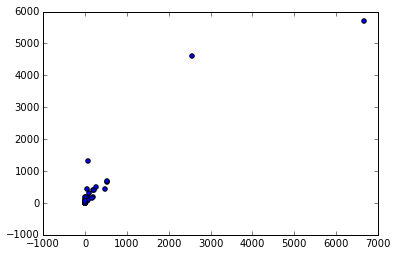

In [14]:
plt.scatter(mammals['body'], mammals['brain'])

In [22]:
mammals.head()

,Name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [19]:
body = mammals['body'][:, np.newaxis].astype(float)
body.shape
body[0:6]

array([[   3.385],
       [   0.48 ],
       [   1.35 ],
       [ 465.   ],
       [  36.33 ],
       [  27.66 ]])

In [23]:
brain = mammals['brain'].values
print (brain.shape)
brain[0:4]

(62,)


array([  44.5,   15.5,    8.1,  423. ])

In [24]:
body= sm.add_constant(body)

In [25]:
regression1=sm.OLS(brain,body)

results1 = regression1.fit()

print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Thu, 21 May 2015   Prob (F-statistic):           1.54e-28
Time:                        21:35:01   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.0

In [26]:
print('Parameters: ', results1.params)
print('R2:', results1.rsquared)

Parameters:  [ 91.00439621   0.96649637]
R2: 0.872662084304


Let us plot the model we fitted:

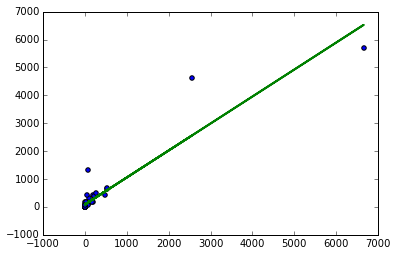

In [27]:
plt.scatter(body[:,1], brain)
plt.plot(body[:,1], results1.predict(body), color='green', linewidth=2)

Not too bad, but hang on, what is that clump in the bottom left-hand corner... 

Let us take a look, by taking the logarithm of both the body and the brain variables

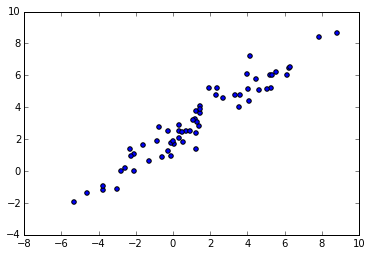

In [28]:
from numpy import log
mammals['log_body'] = log(mammals['body'])
mammals['log_brain'] = log(mammals['brain'])
plt.scatter(mammals['log_body'], mammals['log_brain'])

This looks more like a line!!! Your task is now to run the linear regression with the trasformed variables. Make sure that your coefficients are transformed back! 